## 2. Redes Neurais

### Objetivos

  - Conhecer e praticar técnicas de Dropout, BatchNormalization e AveragePooling2D
  - Aprender e aplicar a estrátégia de treinamento com ModelCheckpoint
  - conhecer e utilizar o google drive em conjunto com o colab
  

### 1. Carregando Bibliotecas

In [ ]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.layers import BatchNormalization
#from keras.utils import np_utils
from keras.utils import to_categorical
#from keras.utils import plot_model
from keras.utils import plot_model

import tensorflow as tf

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


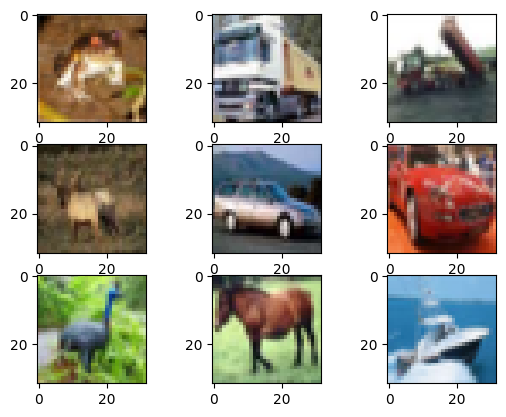

In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [ ]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
num_classes

10

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [ ]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

- Use camadas convolucionais de tamanho progressivamente crescente: Utilize múltiplas camadas convolucionais com um número crescente de filtros (por exemplo, 32, 64, 128). Isso ajuda a capturar características mais complexas nas imagens à medida que se aprofunda na rede.

- Máximo de camadas de "pooling" (2x2): Insira camadas de pooling (máximo pooling) após grupos de camadas convolucionais para reduzir as dimensões espaciais da entrada (por exemplo, 2x2 pooling). Isso ajuda a reduzir a complexidade computacional e controlar o overfitting.

- Camadas totalmente conectadas: Adicione uma ou mais camadas totalmente conectadas (fully connected layers) após as camadas convolucionais e de pooling para combinar as características extraídas e realizar a classificação.

- Última camada totalmente conectada com 10 saídas (10 classes de categoria de imagem): A última camada da rede deve ser uma camada totalmente conectada com 10 neurônios (unidades) de saída, correspondendo às 10 classes de imagem no seu problema de classificação. Use a função de ativação softmax para obter as probabilidades das classes.

- "Dropout" de 0,2-0,5: Aplique a técnica de Dropout entre as camadas, especialmente nas camadas totalmente conectadas, com uma taxa de dropout entre 0,2 e 0,5. Isso ajuda a prevenir overfitting, desligando aleatoriamente neurônios durante o treinamento.
- "BatchNormalization" após convolução: Utilize camadas de Batch Normalization após as camadas convolucionais para normalizar as ativações da camada anterior. Isso ajuda a acelerar o treinamento e a estabilizar a rede neural.








In [ ]:
## primeira tentativa
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))



## Segunda tentativa

# from keras.layers import BatchNormalization
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(32, 32, 3), padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

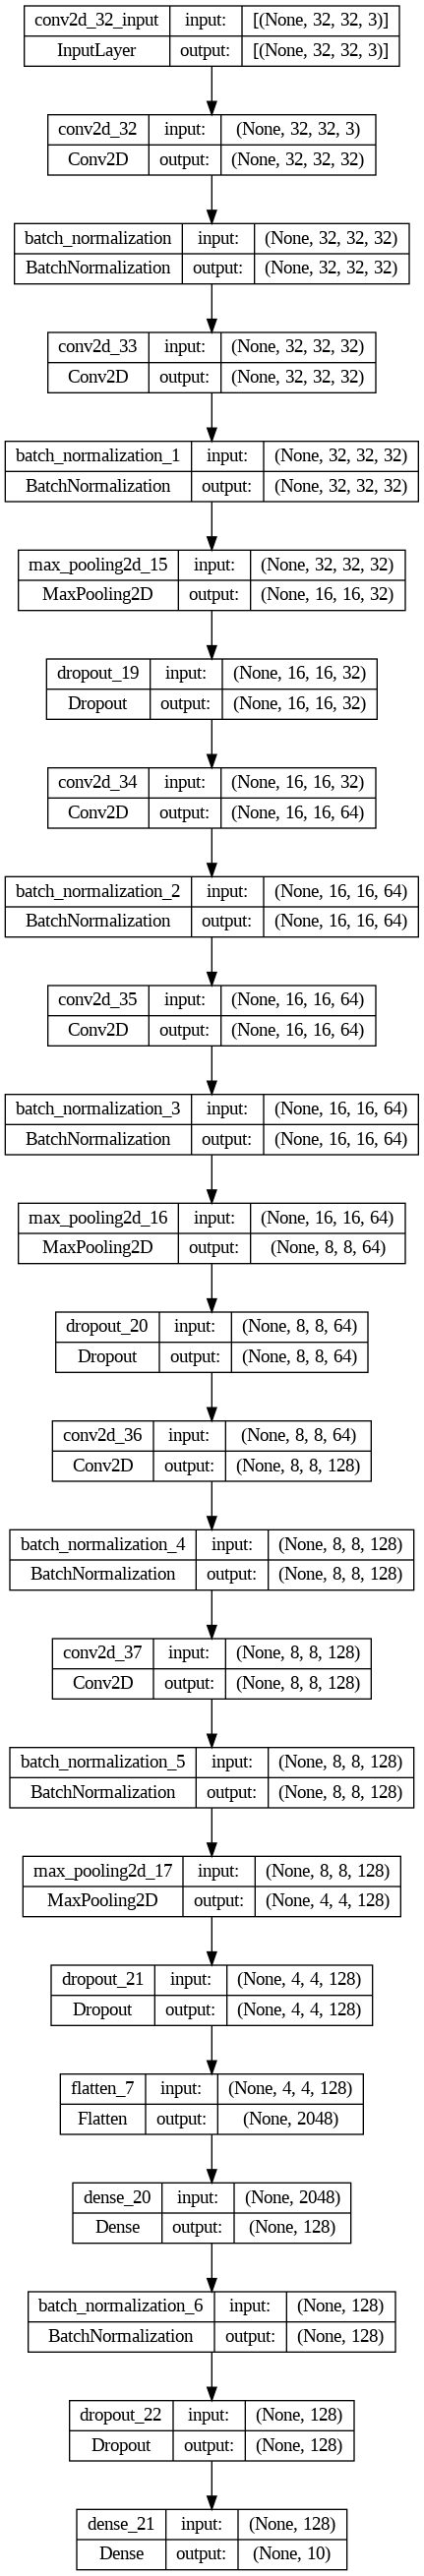

In [ ]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 7. Treinando o modelo

Treinar modelos de aprendizado profundo pode ser uma tarefa demorada, especialmente para modelos complexos e conjuntos de dados grandes. Para garantir que você não perca o progresso e consiga restaurar o melhor modelo encontrado durante o treinamento, o Keras oferece a callback ModelCheckpoint. Esta ferramenta permite salvar o modelo atual após cada época, ou quando uma métrica específica melhora, facilitando a recuperação do melhor modelo

In [ ]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/checkpoints/modelocifar.h5', verbose=1,  save_best_only=True, monitor='val_accuracy') #

hist = model.fit(x_train, y_train, batch_size=100, epochs=30, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/30
450/450 [==============================] - ETA: 0s - loss: 1.8334 - accuracy: 0.3789
Epoch 1: val_accuracy improved from -inf to 0.33460, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
450/450 [==============================] - 14s 18ms/step - loss: 1.8334 - accuracy: 0.3789 - val_loss: 2.0108 - val_accuracy: 0.3346
Epoch 2/30
448/450 [============================>.] - ETA: 0s - loss: 1.2611 - accuracy: 0.5463
Epoch 2: val_accuracy improved from 0.33460 to 0.62680, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
450/450 [==============================] - 9s 19ms/step - loss: 1.2608 - accuracy: 0.5466 - val_loss: 1.0417 - val_accuracy: 0.6268
Epoch 3/30
450/450 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.6208
Epoch 3: val_accuracy improved from 0.62680 to 0.66700, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
450/450 [==============================] -

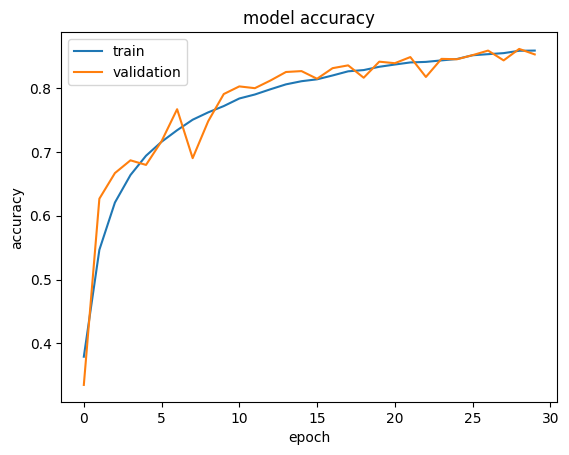

In [ ]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [ ]:
model = load_model("/content/drive/My Drive/checkpoints/modelocifar.h5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7767000198364258


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [ ]:
y_hat = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_hat[100,:]

array([5.8770423e-05, 9.3314156e-08, 5.6933337e-03, 1.1897533e-04,
       3.1580424e-01, 3.2564318e-03, 6.1175911e-08, 6.7506504e-01,
       1.1326588e-06, 1.8971995e-06], dtype=float32)

In [ ]:
np.argmax(y_hat[100,:])

7

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

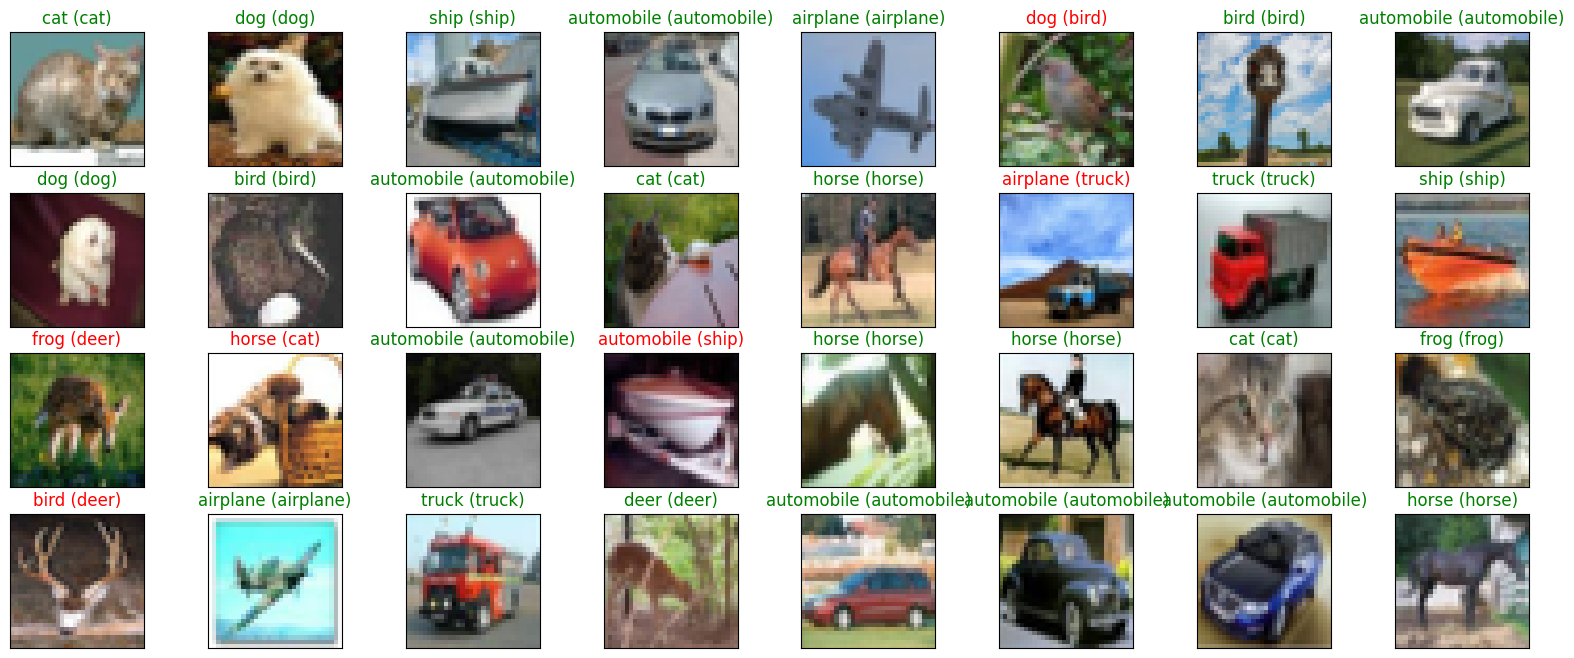

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
